# Inaugural Project 





For this inaugural project, we will be working with a benchmark model of insurance policies, namely the Mossin's Model. 

The agent holds assets $y$, and and may suffer a monetary loss $x$. The loss incurs with probability $p$, and utility of the agents is given by $u(\cdot)$. 

The agents expected value while not insured is given by $$V_0=pu(y-x)+(1-p)u(y),$$

An insurance company offers insurance coverage $q$ at a premium $\pi$. The covered amount can not exceed the monetary loss, thus $q\in [0,x]$. 

Insurance companys premium is $$\pi(p,q)=pq,$$

The agents expected value while insured is given by $$V(q;\pi)= pu (y-x + q - \pi(p,q)) + (1-p)u(y - \pi(p,q)), $$

Utility of the agent is given by $$u(z)=\frac{z^{1+\vartheta}}{1+\vartheta}$$


We have the following parameters given:
$$y=1, p=0.2, \vartheta=-2$$


Initially, we import the packages and functions required for the analysis. 

In [1]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import inauguralproject as ip


## Question 1

$i)$
In this question we are to construct a function that takes $(x, y, p)$ as arguments and returns the agents optimal insurance coverage $q^*$.

First we define the function for the agents Utility and expected value. 

In [2]:
def utility(z, theta):
    u = (z**(1+theta))/(1+theta)
    return u

def exp_utility(q, x, y, p):
    V = p*utility(y-x+(1-p)*q, theta) + (1-p)*utility(y-p*q, theta)
    return V


Next we define the parameters as given in the problem. We define the function $q\_optimize$, using the Lambda syntax to evaluate the expression for $q$. From the Scipy package we use the optimize.mimimize_scalar, which will maximize the objective within the given bounds. Since this maximizes, and we are trying to minimize the function, the utility function is negated in the Lambda syntax. The bounds are set between 0 and 1, since the agents assets are $y=1$, and the loss can not be greater than the current endowment, and therefore the coverage can not exceed this either. 

In [15]:
y = 1
p = 0.2
theta = -2

def q_optimize(x, y, p):
    obj = lambda q: -exp_utility(q, x, y, p)
    res = optimize.minimize_scalar(obj, bounds=(0, 1), method='bounded')
    return res.x


$ii) \& iii)$
In these subquestion, we are to create a grid of x, in the range $[0.01, 0.9]$. For that we use the $linspace$ function from $numpy$, which creates 100 random observations between the two given bounds. We likewise create a grid of 100 observations for $q^*$, which only consists of zeros. This grid will be used to plug in the results from the $q\_optimize$ function defined above, which is done in the enumerate function below.  

In [16]:
# grid for xs
xs = np.linspace(0.01, 0.9, 100)

# grid for qstar
qstar = np.zeros(100)

# loop
for i, x in enumerate(xs):
    qstar[i] = q_optimize(x, y, p)

$iiii)$ For the plot, we have the monetary loss $x$, on the x-axis, and the coverage amount $q$, on the y-axis. The plot shows a perfect $45^{\circ}$ line between the two axis, suggesting that the optimal coverage for the agent should equal his monetary loss.

Text(0.5, 1.0, 'Optimal insurance coverage, $q^*$')

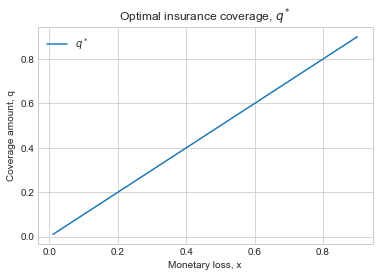

In [17]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(xs, qstar,'-', label='$q^*$')
ax.legend(loc='upper left')
ax.set_xlabel('Monetary loss, x')
ax.set_ylabel('Coverage amount, q')
ax.set_title('Optimal insurance coverage, $q^*$')


## Question 2

For this section, we are to find the acceptable contracts from the POV of the agent. FOr this, we make a function to calculate which values of the insurance premium $\pi$, will make the agent indifferent. 

In [5]:
x = 0.6

# grid for qs between 0.01 and 0.6
qs = np.linspace(0.01, 0.6, 100)

def V_pi(pi, q, x, y, p):
    return p*utility(y-x+q-pi, theta) + (1-p)*utility(y-pi, theta)

V0 = V_pi(0, 0, x, y, p)


In [6]:
def optimal_pi(q, x, y, p, V0):
    # objective function
    def obj(pi):
        return V_pi(pi, q, x, y, p) - V0
    # optimize
    res = optimize.root(obj, 0.1)
    return res.x



# grid for pi calculations
pis = np.zeros(100)
pi_norm = p*qs
# loop
for i, q in enumerate(qs):
    pis[i] = optimal_pi(q, x, y, p, V0)
    

Text(0.5, 1.0, 'Set of feasible premiums for a given $q$')

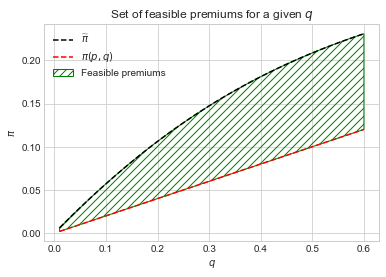

In [7]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(qs, pis,'--', color='black', label='$\widetilde{\pi}$')
ax.plot(qs, pi_norm, '--', color='red', label='$\pi (p,q)$')
ax.fill_between(qs, pis, pi_norm, color='none', hatch='///', edgecolor='g', label='Feasible premiums')
ax.legend(loc='upper left')
ax.set_xlabel('$q$')
ax.set_ylabel('$\pi$')
ax.set_title('Set of feasible premiums for a given $q$')

## Question 3

Explain your code and procedure

In [8]:
alpha = 2
beta = 7
N = 10000

In [9]:
def g(x, y, gamma, pi):
    return utility(y-(1-gamma)*x-pi, theta)

In [10]:
def monte_carlo(y, p, gamma, pi, N):
    np.random.seed(123)
    # Draws of X
    xlist = np.random.beta(alpha, beta, N)
    return np.mean(g(xlist, y, gamma, pi))

In [11]:
# gamma = 0.9, pi = 0.2
print(monte_carlo(y, p, 0.9, 0.2, N))

-1.2858562100115782


In [12]:
# gamma = 0.45, pi = 0.1
print(monte_carlo(y, p, 0.45, 0.1, N))

-1.2965582462632568


## Question 4

In [13]:
pi = 0.1

In [14]:
def optimal_pi2(y, p, gamma, pi, N, V0):
    def obj(pi): 
        return monte_carlo(y, p, gamma, pi, N) - V0
    # Optimize
    res = optimize.root(obj, 0.1, method="broyden1")
    return res.x

print(optimal_pi2(y, p, 0.95, pi, N, V0))

0.21967064885141938


ADD CONCISE CONLUSION.